# 错误和异常
* 作为Python初学者，在刚学习Python编程时，经常会看到一些报错信息，在前面我们没有提及，这章节我们会专门介绍。
* Python有两种错误很容易辨认：语法错误和异常。

# 语法错误
Python 的语法错误或者称之为解析错，是初学者经常碰到的

In [55]:
if True
    print('hello quant')

SyntaxError: invalid syntax (<ipython-input-55-cce496cdf8d9>, line 1)

# 异常
即便Python程序的语法是正确的，在运行它的时候，也有可能发生错误。运行期检测到的错误被称为异常。

大多数的异常都不会被程序处理，都以错误信息的形式展现在这里

In [6]:
1/0

ZeroDivisionError: division by zero

In [7]:
xx=xxx*4

NameError: name 'xxx' is not defined

In [8]:
'hello'+1111

TypeError: must be str, not int

异常以不同的类型出现，这些类型都作为信息的一部分打印出来: 例子中的类型有 ZeroDivisionError，NameError 和 TypeError。
错误信息的前面部分显示了异常发生的上下文，并以调用栈的形式显示具体信息。

# 异常处理
* 语法：
> ```
try:
    code
except (TypeError...):
    code
```
* try语句按照如下方式工作:
>* 首先，执行try子句（在关键字try和关键字except之间的语句）
>* 如果没有异常发生，忽略except子句，try子句执行后结束。
>* 如果在执行try子句的过程中发生了异常，那么try子句余下的部分将被忽略。如果异常的类型和 except 之后的名称相符，那么对应的except子句将被执行。最后执行 try 语句之后的代码。
>* 如果一个异常没有与任何的except匹配，那么这个异常将会传递给上层的try中。

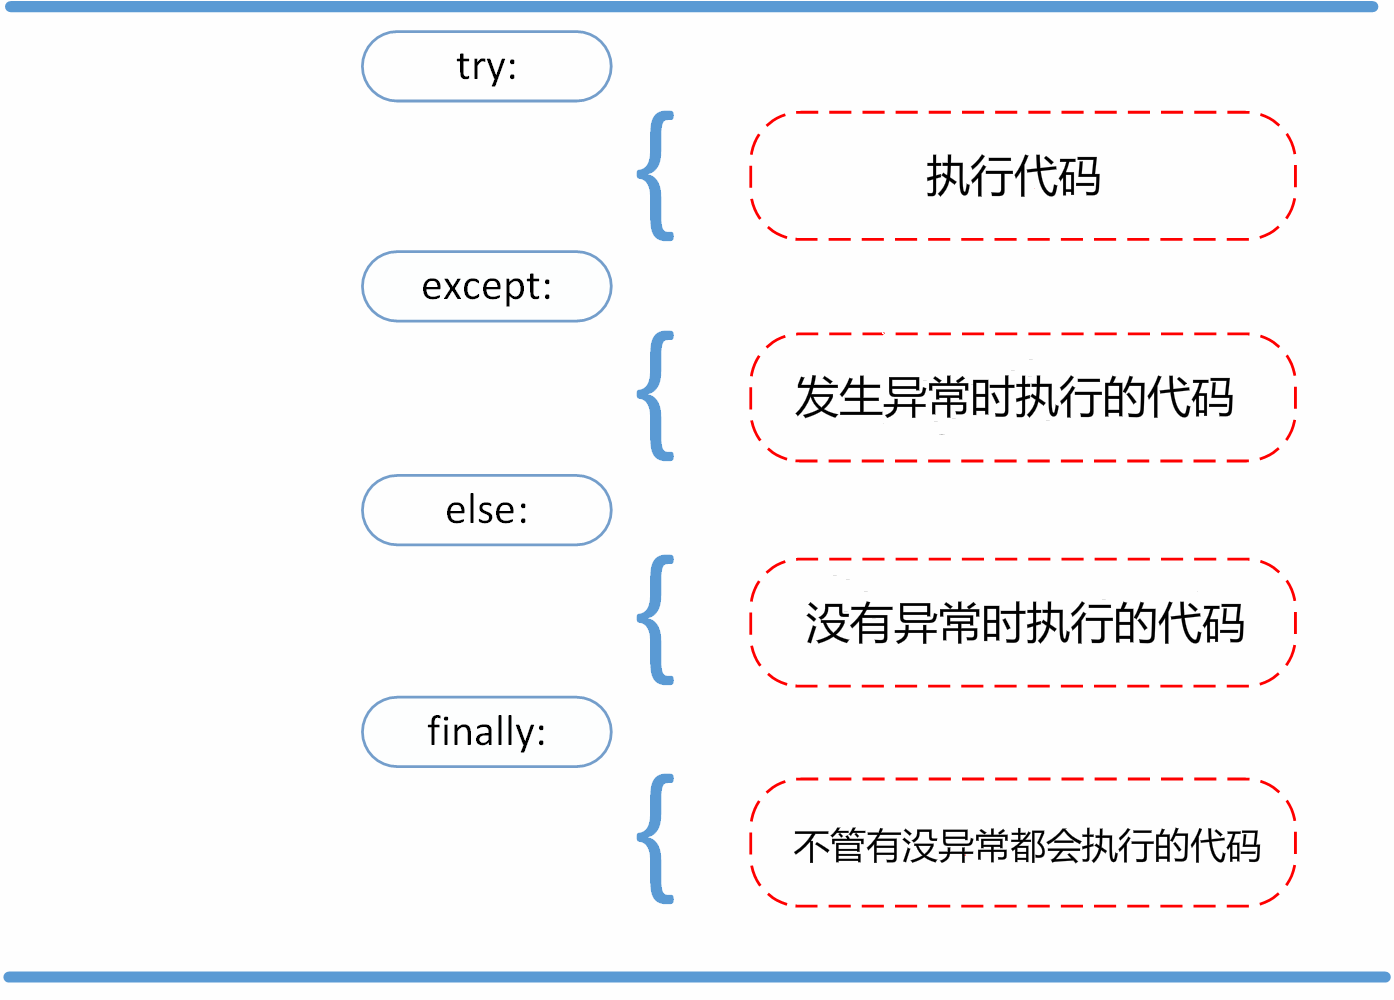

In [15]:
try:
    x=1/0
except NameError:
    print('零除问题！')
except TypeError:
    print("TypeError!")
except:
    print("error!")

error!


* 一个 try 语句可能包含多个except子句，分别来处理不同的特定的异常。最多只有一个分支会被执行。
* 处理程序将只针对对应的try子句中的异常进行处理，而不是其他的 try 的处理程序中的异常。
* 一个except子句可以同时处理多个异常，这些异常将被放在一个括号里成为一个元组

In [16]:
try:
    x=1/0
except (NameError,TabError,ZeroDivisionError):
    print("error!")

error!


try except 语句还有一个可选的else子句，如果使用这个子句，那么必须放在所有的except子句之后。这个子句将在try子句没有发生任何异常的时候执行。

使用 else 子句比把所有的语句都放在 try 子句里面要好，这样可以避免一些意想不到的、而except又没有捕获的异常。

# 抛出异常
Python 使用 raise 语句抛出一个指定的异常。

In [32]:
raise NameError('hello error')

NameError: hello error

* raise 唯一的一个参数指定了要被抛出的异常。它必须是一个异常的实例或者是异常的类（也就是 Exception 的子类）。
* 如果你只想知道这是否抛出了一个异常，并不想去处理它，那么一个简单的 raise 语句就可以再次把它抛出。

In [35]:
try:
    raise NameError('error')
except:
    print('found error!')
    raise

found error!


NameError: error

# 用户自定义异常
你可以通过创建一个新的异常类来拥有自己的异常。异常类继承自 Exception 类，可以直接继承，或者间接继承

In [36]:
class MyError(Exception):
    def __init__(self,value):
        self.value=value
    def __str__(self):
        return repr(self.value)

In [39]:
type(MyError('my error'))

__main__.MyError

In [42]:
try:
    raise MyError('hello error')
except MyError as e:
    print(e.value)

hello error


# 定义清理行为
try 语句还有另外一个可选的子句，它定义了无论在任何情况下都会执行的清理行为。

In [46]:
try:
    raise MyError('error')
    x=1
finally:
    print('finally!')

finally!


MyError: 'error'

以上例子不管 try 子句里面有没有发生异常，finally 子句都会执行。
如果一个异常在 try 子句里（或者在 except 和 else 子句里）被抛出，而又没有任何的 except 把它截住，那么这个异常会在 finally 子句执行后再次被抛出。

# 预定义的清理行为
* 一些对象定义了标准的清理行为，无论系统是否成功的使用了它，一旦不需要它了，那么这个标准的清理行为就会执行。
* 关键词 with 语句就可以保证诸如文件之类的对象在使用完之后一定会正确的执行他的清理方法

In [53]:
with open("log.txt") as f:
    for line in f:
        print(line, end="")

python是一个很适合做量化投资的语言。
那么为了做好量化投资，第一步就是学好python！

In [54]:
f.closed

True